Importing Necessary Libraries

In [18]:
import pandas as pd
import os

Merging 12 months of sales into a single CSV file 

In [19]:
df =pd.read_csv("./Sales_Data/Sales_April_2019.csv")

### read all files from directory
files = [file for file in os.listdir('./Sales_Data')]

### creating empty data frame
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    ### concatenate each month
    all_months_data = pd.concat([all_months_data, df])

### saving withouth indexes
    all_months_data.to_csv("all_data.csv", index=False)


Read in updated dataframe
--> don't have to run code above to acess all data file 

In [20]:
all_data = pd.read_csv("all_data.csv")
all_data.head ()

Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301

Question 1: What was the best month for sales? How much was earned that month? 

In [1]:
### debug
import pandas as pd
all_data = pd.read_csv("all_data.csv")

Data Cleanup

In [20]:
### converting columns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric (all_data['Quantity Ordered'], errors='coerce') 
all_data['Price Each'] = pd.to_numeric (all_data['Price Each'], errors='coerce') 

In [3]:
### finding "Or" by indexing it and delating it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop               1.0     1700.00   
1   295666    LG Washing Machine               1.0      600.00   
2   295667  USB-C Charging Cable               1.0       11.95   
3   295668      27in FHD Monitor               1.0      149.99   
4   295669  USB-C Charging Cable               1.0       11.95   

       Order Date                        Purchase Address  
0  12/30/19 00:01  136 Church St, New York City, NY 10001  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001  
2  12/12/19 18:21    277 Main St, New York City, NY 10001  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301

Task 1: Add Month Column

In [4]:
### adding "Month" column, grabing from "Order Date" the first two characters
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()


Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop               1.0     1700.00   
1   295666    LG Washing Machine               1.0      600.00   
2   295667  USB-C Charging Cable               1.0       11.95   
3   295668      27in FHD Monitor               1.0      149.99   
4   295669  USB-C Charging Cable               1.0       11.95   

       Order Date                        Purchase Address Month  
0  12/30/19 00:01  136 Church St, New York City, NY 10001    12  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001    12  
2  12/12/19 18:21    277 Main St, New York City, NY 10001    12  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016    12  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301    12

Task 2: Add Sales Column

In [5]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID               Product  Quantity Ordered  Price Each  \
0   295665    Macbook Pro Laptop               1.0     1700.00   
1   295666    LG Washing Machine               1.0      600.00   
2   295667  USB-C Charging Cable               1.0       11.95   
3   295668      27in FHD Monitor               1.0      149.99   
4   295669  USB-C Charging Cable               1.0       11.95   

       Order Date                        Purchase Address Month    Sales  
0  12/30/19 00:01  136 Church St, New York City, NY 10001    12  1700.00  
1  12/29/19 07:03     562 2nd St, New York City, NY 10001    12   600.00  
2  12/12/19 18:21    277 Main St, New York City, NY 10001    12    11.95  
3  12/22/19 15:13     410 6th St, San Francisco, CA 94016    12   149.99  
4  12/18/19 12:38           43 Hill St, Atlanta, GA 30301    12    11.95

Task 3: Group by Month and sum

In [11]:
results = all_data.groupby('Month').sum(numeric_only=True)

Answer: Best month for sales was December with 4 613 443.34 US $ income in Sales.

Data Visualisation 

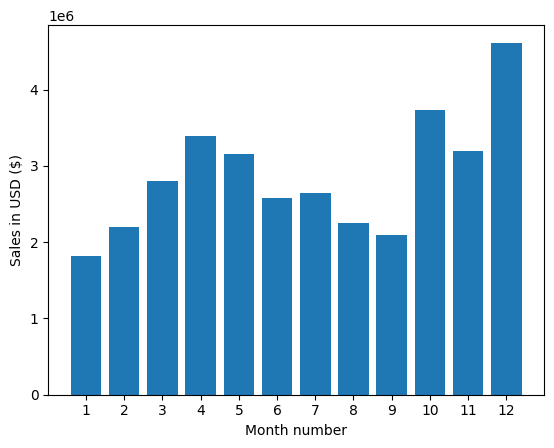

In [19]:
import matplotlib.pyplot as plt
import numpy as np

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()